<a href="https://colab.research.google.com/github/jonsPavel/Practice/blob/main/mnist_predict_done_poly_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модель разпознования цифр размера (28x28) с обучающим датасетом MNIST

In [ ]:
#импорт TenserFlow - для обучения модели, plt - отрисовка, np - работа с числами

import tensorflow as tf 
from matplotlib import pyplot as plt
import numpy as np

Загрузим данные MNIST и разделим выборки.

In [ ]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Обзор картинок:

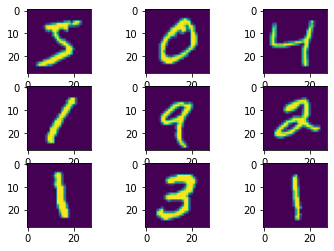

In [ ]:
for i in range(9):
	# создадим доску
	plt.subplot(330 + 1 + i)
	# отрисуем картинки
	plt.imshow(training_images[i])


In [ ]:
print('Кол-во и размер изображений ',training_images.shape)
print('Представление в виде матрицы:\n',training_images[0])

Кол-во и размер изображений  (60000, 28, 28)
Представление в виде матрицы:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0  

In [ ]:
#Нормализуем: Value--> [0,1]

training_images  = training_images / 255.0
test_images = test_images / 255.0

Создадим нейронную сеть из последовательности слоёв.

Слои:
1. Входной слой для каждого пикселя, количество = 28*28
2. Скрытый слой сети со связью каждый с каждым и функцией активации 'relu':   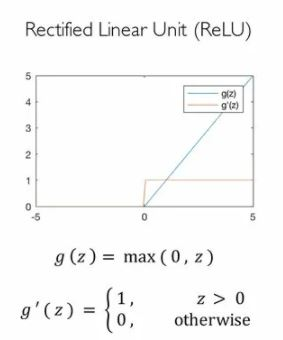
3. Выходной слой с вероятностью возникновения цифр от 0 до 9, активация = наибольшая вероятность

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#оптимизация, настройки сети

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#обучение 

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2581 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1133 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0781 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0459 - accuracy: 0.9856


In [ ]:
print(model.evaluate(test_images,test_labels))
#print(model.predict(test_images[0]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9772
[0.07081610709428787, 0.9771999716758728]


Логичечкий вывод нейронки: 7


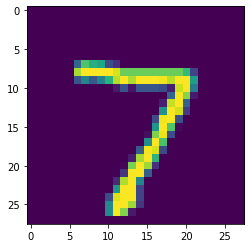

In [ ]:
plt.imshow(test_images[0])
prediction=model.predict(test_images)
print('Логичечкий вывод нейронки:',np.argmax(prediction[0]))

# Испробуем нейронную сеть!

In [ ]:
#@title Загрузим изображение (черный фон)
from google.colab import files
uploaded = files.upload()
filename=list(uploaded.keys())[0]

Saving 2_на_чёрном.jpg to 2_на_чёрном (2).jpg


In [ ]:
#@title Конвертируем его в матрицу цвета

gray_image = image.load_img(filename, target_size=(28, 28), color_mode = "grayscale")

n_image = np.around(np.divide(gray_image, 255.0), decimals=8)


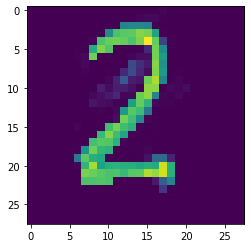

In [ ]:
# Итоговое изображение для входа нейросети 

plt.imshow(n_image)

In [ ]:
# Предскажим наконец!

prediction=model.predict(np.reshape(n_image, (1, 28, 28)))
print(np.argmax(prediction))

2


In [ ]:
# Вероятности каждой цифры:

np.round(prediction, 8)

array([[8.900000e-07, 3.076700e-04, 9.995007e-01, 8.377000e-05,
        0.000000e+00, 1.700000e-07, 8.470000e-06, 0.000000e+00,
        9.826000e-05, 0.000000e+00]], dtype=float32)

Saving 9_на_чёрном.jpg to 9_на_чёрном.jpg
2


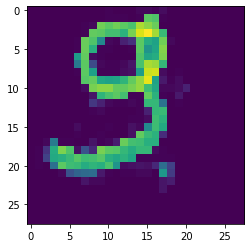

In [ ]:
#@title Попробуем еще раз!

uploaded = files.upload()
filename=list(uploaded.keys())[0]


gray_image = image.load_img(filename, target_size=(28, 28), color_mode = "grayscale")

n_image = np.around(np.divide(gray_image, 255.0), decimals=8)


prediction=model.predict(np.reshape(n_image, (1, 28, 28)))
print(np.argmax(prediction))
plt.imshow(n_image)